In [1]:
import numpy as np
import sympy as sym
import scipy as sp
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.patches import Circle, Polygon, Wedge


In [13]:
def rot(a):
    # return np.array([np.cos(a), np.sin(a)])
    return np.array([sym.cos(a), sym.sin(a)])

In [15]:
rot(5*sym.pi/6)

array([-sqrt(3)/2, 1/2], dtype=object)

In [33]:
# матриця координат базисних коренів, по стовпчикам
a1 = rot(0)
a2 = sym.sqrt(3) * rot(5*sym.pi / 6)
A = np.c_[a1,a2]
aa = [a1, a2]
a1, a2

(array([1, 0], dtype=object), array([-3/2, sqrt(3)/2], dtype=object))

In [40]:
def mdot(x,y):
    return 2*x.dot(y) / y.dot(y)

In [41]:
# Матриця Картана
C = sym.zeros(2,2)
for i in range(2):
    for j in range(2):
        C[i,j] = mdot(A[:,i],A[:,j])
C

Matrix([
[ 2, -1],
[-3,  2]])

In [42]:
def dual(a):
    return 2*a / a.dot(a)

def dualwith(x,a):
    return 2*x / a.dot(a)

In [43]:
dual_a1, dual_a2 = dual(a1), dual(a2)
dual_aa = [dual_a1, dual_a2]
print(dual_aa)

[array([2, 0], dtype=object), array([-1, sqrt(3)/3], dtype=object)]


In [44]:
w1 = np.array([1/2, sym.sqrt(3)/2])
w2 = np.array([0, sym.sqrt(3)])
ww = [w1, w2]
print(ww)

[array([0.5, sqrt(3)/2], dtype=object), array([0, sqrt(3)], dtype=object)]


In [48]:
for i in range(2):
    for j in range(2):
        print(f"(w_{i}, dual_a_{j}) = ", ww[i].dot(dual_aa[j]))

(w_0, dual_a_0) =  1.00000000000000
(w_0, dual_a_1) =  0
(w_1, dual_a_0) =  0
(w_1, dual_a_1) =  1


In [46]:
dual_w1 = dualwith(w1, a1)
dual_w2 = dualwith(w2, a2)
dual_ww = [dual_w1, dual_w2]
print(dual_ww)

[array([1.00000000000000, sqrt(3)], dtype=object), array([0, 2*sqrt(3)/3], dtype=object)]


In [47]:
for i in range(2):
    for j in range(2):
        print(f"(dual_w_{i}, a_{j}) = ", dual_ww[i].dot(aa[j]))

(dual_w_0, a_0) =  1.00000000000000
(dual_w_0, a_1) =  0
(dual_w_1, a_0) =  0
(dual_w_1, a_1) =  1


In [51]:
def refl(x, a):
    return x - mdot(x,a)*a

In [53]:
k1, k2 = 3, 2
xi = k1*a1 + k2*a2
xi

array([0, sqrt(3)], dtype=object)

In [60]:
for i,a in enumerate(aa): print(f'a_{i+1} = ', a)
for i,w in enumerate(ww): print(f'w_{i+1} = ', w)
for i,da in enumerate(dual_aa): print(f'dual_a_{i+1} = ', da)
for i,dw in enumerate(dual_ww): print(f'dual_w_{i+1} = ', dw)

a_1 =  [1 0]
a_2 =  [-3/2 sqrt(3)/2]
w_1 =  [0.5 sqrt(3)/2]
w_2 =  [0 sqrt(3)]
dual_a_1 =  [2 0]
dual_a_2 =  [-1 sqrt(3)/3]
dual_w_1 =  [1.00000000000000 sqrt(3)]
dual_w_2 =  [0 2*sqrt(3)/3]


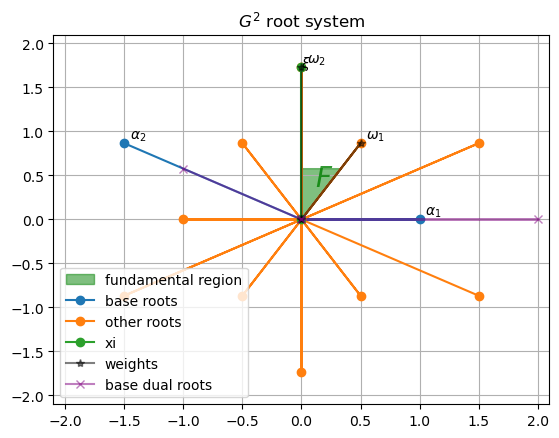

In [74]:
plt.xlim(-2.1,2.1)
plt.ylim(-2.1,2.1)
plt.grid()

# fundamental region F
F_vertices = [np.zeros(2), dual_w1/k1, dual_w2/k2]
plt.gca().add_patch(Polygon(F_vertices, closed=True, color='green', alpha=0.5, label='fundamental region'))
plt.text(*(np.mean(F_vertices, axis=0)), '$F$', {'fontsize': 20}, alpha=0.8, color='green')

line = []
for i,a in enumerate(aa):
    line.append(np.zeros(2))
    line.append(a)
    plt.text(*(a+0.05), '$\\alpha_{'+str(i+1)+'}$')
plt.plot(*(np.array(line).T), '-o', label='base roots')

line = []
rootsystem = [a1+a2, 2*a1+a2, 3*a1+a2, 3*a1+2*a2]
rootsystem += list(map(lambda x: -x, rootsystem))
rootsystem += [-a1, -a2]
for a in rootsystem:
    line.append(np.zeros(2))
    line.append(a)
plt.plot(*(np.array(line).T), '-o', label='other roots')

plt.plot([0, xi[0]],[0, xi[1]], '-o', label='xi')
plt.text(*(xi), '$\\xi$')

line = []
weights = ww
for i,a in enumerate(weights):
    line.append(np.zeros(2))
    line.append(a)
    plt.text(*(a+0.05), '$\\omega_{'+str(i+1)+'}$')
plt.plot(*(np.array(line).T), '-*', label='weights', c='black', alpha=0.5)

line = []
for a in aa:
    line.append(np.zeros(2))
    line.append(dual(a))
plt.plot(*(np.array(line).T), '-x', label='base dual roots', c='purple', alpha=0.5)

# line = [-10*w1, 10*w1]
# plt.plot(*(np.array(line).T), '--', c='k', lw=1, alpha=0.5)
# line = [-10*w2, 10*w2]
# plt.plot(*(np.array(line).T), '--', c='k', lw=1, alpha=0.5)
# line = [-10*w3, 10*w3]
# plt.plot(*(np.array(line).T), '--', c='k', lw=1, alpha=0.5)

# test = refl(w2,a2)
# plt.plot([0,test[0]],[0,test[1]],'-^', label='test')

plt.title("$G^2$ root system")
plt.legend()

In [70]:
def refl0(x):
    return refl(x,xi) + 2*xi / np.dot(xi,xi)

all(refl0(xi) - xi < 1e-7)

True

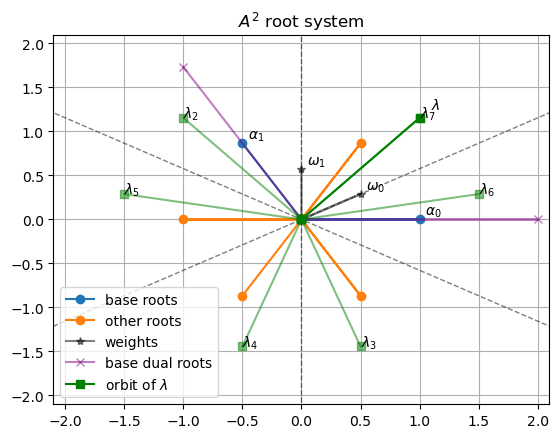

In [57]:
plt.xlim(-2.1,2.1)
plt.ylim(-2.1,2.1)
plt.grid()

line = []
for i,a in enumerate(A.T):
    line.append(np.zeros(2))
    line.append(a)
    plt.text(*(a+0.05), '$\\alpha_{'+str(i)+'}$')
plt.plot(*(np.array(line).T), '-o', label='base roots')

line = []
rootsystem = [a1+a2, -a1, -a2, -a1-a2]
for a in rootsystem:
    line.append(np.zeros(2))
    line.append(a)
plt.plot(*(np.array(line).T), '-o', label='other roots')

line = []
weights = W.T
for i,a in enumerate(weights):
    line.append(np.zeros(2))
    line.append(a)
    plt.text(*(a+0.05), '$\\omega_{'+str(i)+'}$')
plt.plot(*(np.array(line).T), '-*', label='weights', c='black', alpha=0.5)

line = []
for a in A.T:
    line.append(np.zeros(2))
    line.append(dual(a))
plt.plot(*(np.array(line).T), '-x', label='base dual roots', c='purple', alpha=0.5)

line = [-10*w1, 10*w1]
plt.plot(*(np.array(line).T), '--', c='k', lw=1, alpha=0.5)
line = [-10*w2, 10*w2]
plt.plot(*(np.array(line).T), '--', c='k', lw=1, alpha=0.5)
line = [-10*w3, 10*w3]
plt.plot(*(np.array(line).T), '--', c='k', lw=1, alpha=0.5)


orb = [lam]
plt.plot([0, lam[0]], [0, lam[1]], '-s', label='orbit of $\lambda$', c='g')
plt.text(*(lam+0.1), '$\lambda$')
for i in range(3):
    lam1 = refl(orb[-1], a1)
    plt.plot([0, lam1[0]], [0, lam1[1]], '-s', label='', c='g', alpha=0.5)
    plt.text(*lam1, '$\lambda_{'+str(2*i+2)+'}$')
    lam2 = refl(lam1, a2)
    plt.plot([0, lam2[0]], [0, lam2[1]], '-s', label='', c='g', alpha=0.5)
    plt.text(*lam2, '$\lambda_{'+str(2*i+3)+'}$')
    orb += [lam1, lam2]



plt.title("$A^2$ root system")
plt.legend()

In [66]:
r1 = np.array([[-1, 0],[1,1]])
r2 = np.array([[1, 3],[0,-1]])

rs = [np.eye(2)]
rnames = ['']
for i in range(6):
    r = rs[-1]
    rname = rnames[-1]
    rs.append(r1 @ r)
    rnames.append('1'+rname)
    rs.append(r2 @ r1 @ r)
    rnames.append('21'+rname)

# assert np.sum(np.abs(rs[-1] - np.eye(2))) < 1e-6
rs = rs[:-1]
rnames = rnames[:-1]
rnames[0] = 'id'

for a,b in zip(rs,rnames):
    print(b, '\n', a, '\n')

print('r2'+rnames[-1]+'=\n', r2 @ rs[-1])

id 
 [[1. 0.]
 [0. 1.]] 

1 
 [[-1.  0.]
 [ 1.  1.]] 

21 
 [[ 2.  3.]
 [-1. -1.]] 

121 
 [[-2. -3.]
 [ 1.  2.]] 

2121 
 [[ 1.  3.]
 [-1. -2.]] 

12121 
 [[-1. -3.]
 [ 0.  1.]] 

212121 
 [[-1.  0.]
 [ 0. -1.]] 

1212121 
 [[ 1.  0.]
 [-1. -1.]] 

21212121 
 [[-2. -3.]
 [ 1.  1.]] 

121212121 
 [[ 2.  3.]
 [-1. -2.]] 

2121212121 
 [[-1. -3.]
 [ 1.  2.]] 

12121212121 
 [[ 1.  3.]
 [ 0. -1.]] 

r212121212121=
 [[1. 0.]
 [0. 1.]]


In [97]:
start = np.array([2, 1])
for r in rs:
    print(r @ start)
print(r2 @ rs[-1] @ start)

[2. 1.]
[-2.  3.]
[ 1. -3.]
[-1. -2.]
[-3.  2.]
[ 3. -1.]
[2. 1.]
